In [1]:
import requests
import bs4
import re
from bs4 import BeautifulSoup
import math
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 12]

# Retrieve Job Description Data from Indeed.com

In [2]:
base_url = ''

# Declare job titles to search on indeed.com
titles = [{
    'title': 'data scientist',
    'urltitle': 'data+scientist'
}, {
    'title': 'quantitative analyst',
    'urltitle': 'quantitative+analyst'
}, {
    'title': 'statistician',
    'urltitle': 'statistician'
}, {
    'title': 'data analyst',
    'urltitle': 'data+analyst'
}, {
    'title': 'research scientist',
    'urltitle': 'research+scientist'
}, {
    'title': 'machine learning engineer',
    'urltitle': 'machine+learning+engineer'
}, {
    'title': 'data engineer',
    'urltitle': 'data+engineer'
}]

In [3]:
# Function to retireve Job Description from provided job url
def storedescription(term, url):
    try:
        r = requests.get('https://www.indeed.com'+url)
        soup = BeautifulSoup(r.text, 'html.parser')
        description = soup.find('div', id="jobDescriptionText").get_text()
        jobdescription.append(description)
    except Exception as e:
        print(f'description error: {e}')
        jobdescription.append("")

In [4]:
# Lists to hold retrieved values
jobtitles = []
urls = []
jobclass = []
jobdescription = []

# search by job title
for term in titles:
    startlen = len(urls)
    try:
#         r = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50'.format(term['urltitle']))
        r = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50'.format(term['urltitle']))
        soup = BeautifulSoup(r.text, 'html.parser')
        count_str = soup.find('div', id="searchCountPages").get_text()
        max_results = int(count_str.split()[3].replace(',', ''))

        # calculate how many pages we need to query
        max_results = math.ceil(max_results/50)
        time.sleep(1)
    except Exception as e:
        print(f'title error: {e}') 

    print('Querying {} pages for {}'.format(max_results, term['title']))
    for x in range(0, max_results):

        try:
            split = '&start='+format(x*50)
#             html = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50+{}'.format(term['urltitle'], split))
            html = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50+{}'.format(term['urltitle'], split))
            soup = BeautifulSoup(html.text, 'html.parser')
            for link in soup.findAll('a'):
                try:
                    # only retireve urls from matching titles
                    if term['title'].lower() in link.attrs['title'].lower():
                        jobtitles.append(link.attrs['title'])
                        urls.append(link.attrs['href'])
                        jobclass.append(term['title'])
                        storedescription(term['title'], link.attrs['href'])
                        
                except Exception as e:
                    print(f'{x} attribute link error: {e}') 
            time.sleep(1)
        except Exception as e:
            print(f'link error: {e}')

    print('.. found {} results for {}'.format(len(urls)-startlen, term['title']))

Querying 11 pages for data scientist
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 a

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribu

.. found 10 results for quantitative analyst
Querying 1 pages for statistician
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: '

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribu

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribu

16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribu

18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribu

19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribu

21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribu

23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribu

25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribu

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribu

15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribu

17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribu

19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribu

20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribu

21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribu

22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribu

24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribu

25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribu

26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribu

27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribu

29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribu

30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribu

32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribu

33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribu

34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribu

35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribu

36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribu

38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribu

39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribu

40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribu

41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribu

42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribu

44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribu

45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribu

46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribu

47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribu

48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribu

50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribu

51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribu

52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribu

53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribu

54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribu

56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribu

57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribu

58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribu

59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribu

61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribu

62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribu

63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribu

64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribu

65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribu

67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribu

68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribu

In [5]:
print(len(jobtitles))
print(len(urls))
print(len(jobclass))
print(len(jobdescription))

539
539
539
539


In [6]:
df = pd.DataFrame({'title': jobtitles, 'jobclass': jobclass, 'url': urls, 'jobdescription': jobdescription})
#df = pd.DataFrame({'jobdescription': jobdescription})

In [7]:
df.to_csv("../exported_data/indeed_data_nyc_raw.csv")

# Process Job Decsription Data

In [8]:
raw_df = pd.read_csv("../exported_data/indeed_data_nyc_raw.csv")
del raw_df["Unnamed: 0"]

jobtitles_raw = raw_df.title.astype(str).values.tolist()
jobclass_raw = raw_df.jobclass.astype(str).values.tolist()
urls_raw = raw_df.url.astype(str).values.tolist()
jobdescription_raw = raw_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_raw)))
print("URLS: " + str(len(urls_raw)))
print("Job Classes: " + str(len(jobclass_raw)))
print("Job Descriptions: " + str(len(jobdescription_raw)))

Jobtitles: 539
URLS: 539
Job Classes: 539
Job Descriptions: 539


In [9]:
raw_df.dtypes

title             object
jobclass          object
url               object
jobdescription    object
dtype: object

In [10]:
raw_df['title'].value_counts()

Data Engineer                                                     124
Senior Data Engineer                                               48
Big Data Engineer                                                  48
Sr. Data Engineer - HBO Max                                        48
Data Engineer (Remote)                                             48
                                                                 ... 
Director, Epidemiology- Safety Surveillance Research Scientist      1
Data Analyst, STARS                                                 1
Data Analyst II, Prime Clerk                                        1
Data Analyst I-MSH/SSVS/ELM                                         1
Model Monitoring Data Scientist                                     1
Name: title, Length: 148, dtype: int64

In [11]:
raw_df['jobclass'].value_counts()

data engineer                363
data scientist                68
data analyst                  66
research scientist            23
quantitative analyst          10
machine learning engineer      7
statistician                   2
Name: jobclass, dtype: int64

In [12]:
def preprocess(line):
    line = line.replace('\n', ' ') # newlines
    line = line.replace('(', ' ')
    line = line.replace(')', ' ')
    line = line.replace('[', ' ') 
    line = line.replace(']', ' ')
    line = line.replace('.', ' ')
    line = line.replace(',', ' ')
    line = line.replace('&', ' ')
    line = line.replace(' - ', ' ')
    line = line.replace(':', ' ') # We dont need summaries, just give me tokens
    line= line.replace('\t', ' ') #tabs
    
    # converts line endings in a way that stops the accidental camelcasing
    # but leaves terms like SAP intact
    line= re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', line)
    
    # regex to address the issue of text continuing directly after a period
    # instead of a space
    line = re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', line))
    return line

In [13]:
raw_df["jobdescription"][10]

"Role:· This is a 3-6 month full-time data scientist contract position with potential to become permanent position based on the performance.· Reporting to the Project Manager, focusing on exploratory data analysis and A/B testing for a live beauty product recommendations engine.· You’ll explore the rich behaviour data collected as people shop using our recommendations and the results from our A/B tests.· You’ll work closely with our technical and product teams to come up with questions and hypotheses about what’s working or could be improved, you’ll help design and interpret future A/B tests, and so you’ll help guide our product roadmap for improving the algorithm.Requirements:· You have expertise in exploratory data analysis and visualisation (e.g. with SQL, Python/Pandas, R, or similar).· You love using data to answer high-level questions about how people use a product.· MS or PhD in computer science, data mining, machine learning, statistics, math, engineering, operations research, 

In [14]:
# jobdescription = df.jobdescription
description = [preprocess(d) for d in jobdescription_raw]

len(description)

539

In [15]:
description[10]

"Role · This is a 3-6 month full-time data scientist contract position with potential to become permanent position based on the performance · Reporting to the Project Manager focusing on exploratory data analysis and A/B testing for a live beauty product recommendations engine · You’ll explore the rich behaviour data collected as people shop using our recommendations and the results from our A/B tests · You’ll work closely with our technical and product teams to come up with questions and hypotheses about what’s working or could be improved you’ll help design and interpret future A/B tests and so you’ll help guide our product roadmap for improving the algorithm Requirements · You have expertise in exploratory data analysis and visualisation e g with SQL Python/Pandas R or similar · You love using data to answer high-level questions about how people use a product · MS or Ph D in computer science data mining machine learning statistics math engineering operations research or other quanti

In [16]:
processed_df = pd.DataFrame({'title': jobtitles_raw, 'jobclass': jobclass_raw, 'url': urls_raw, 'jobdescription': description})
#processed_df = pd.DataFrame({'jobdescription': description})

In [17]:
processed_df.to_csv("../exported_data/indeed_data_nyc_processed.csv")

# Find Words Counts from Processed Descriptions

In [18]:
postprocessed_df = pd.read_csv("../exported_data/indeed_data_nyc_processed.csv")
del postprocessed_df["Unnamed: 0"]

jobtitles_post = postprocessed_df.title.astype(str).values.tolist()
jobclass_post = postprocessed_df.jobclass.astype(str).values.tolist()
urls_post = postprocessed_df.url.astype(str).values.tolist()
jobdescription_post = postprocessed_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_post)))
print("URLS: " + str(len(urls_post)))
print("Job Classes: " + str(len(jobclass_post)))
print("Job Descriptions: " + str(len(jobdescription_post)))

Jobtitles: 539
URLS: 539
Job Classes: 539
Job Descriptions: 539


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row

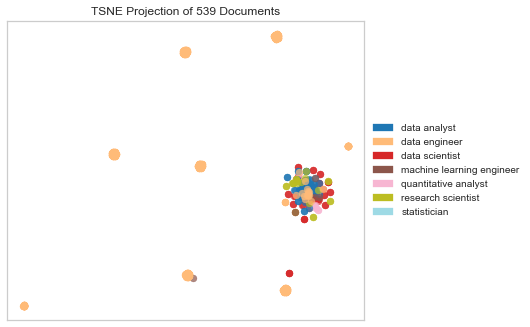

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(jobdescription_post)
y = jobclass_post

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(decompose_by=75, decompose='svd', colormap='tab20')
tsne.fit(X, y)
tsne.show()

In [20]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Initializing Dictionary
d = {}
postprocessed_df["jobdescription_split"] = postprocessed_df["jobdescription"].astype(str).str.lower().str.split()

p_description = postprocessed_df["jobdescription_split"].apply(lambda x: [item for item in x if item not in stop])
p_description

0      [data, scientist, based, manhattan, ny, compet...
1      [description, point, connected, solutions, bus...
2      [data, scientist, senior, consultant, remote, ...
3      [leads, participates, development, validation,...
4      [medidata, leading, digital, transformation, l...
                             ...                        
534    [reonomy, leverages, big, data, partnerships, ...
535    [job, description, looking, big, data, enginee...
536    [overview, overview, strategic, looking, data,...
537    [senior, data, engineer, within, north, americ...
538    [**we, still, hiring, interviewing, position, ...
Name: jobdescription_split, Length: 539, dtype: object

In [22]:
# counting number of times each word comes up in list of words (in dictionary)
for word_list in p_description:
    #word_list = descr.split()
    for word in word_list: 
        d[word] = d.get(word, 0) + 1

In [23]:
word_freq = []
for key, value in d.items():
    word_freq.append((value, key))

In [24]:
word_freq.sort(reverse=True) 
print(word_freq)

[(8556, 'data'), (3689, 'experience'), (1463, 'work'), (1280, 'new'), (1268, 'business'), (1216, 'years'), (1157, 'team'), (1067, 'tools'), (889, 'sql'), (863, 'systems'), (818, 'etc'), (815, 'solutions'), (813, 'preferred'), (806, 'building'), (784, 'big'), (782, 'teams'), (752, 'skills'), (740, 'learning'), (732, 'working'), (728, 'knowledge'), (705, 'health'), (704, 'management'), (699, 'including'), (699, 'architecture'), (688, 'ability'), (683, 'company'), (680, 'pipelines'), (674, 'development'), (670, 'engineer'), (664, 'strong'), (656, 'etl'), (646, 'role'), (637, 'status'), (633, 'analytics'), (629, 'using'), (620, 'engineering'), (610, 'required'), (608, 'science'), (583, 'use'), (575, 'quality'), (575, 'build'), (558, 'design'), (527, 'technical'), (522, 'machine'), (498, 'technologies'), (497, 'support'), (490, 'hbo'), (482, 'people'), (477, 'across'), (470, 'complex'), (464, 'warehouse'), (463, 'technology'), (461, 'requirements'), (458, 'python'), (458, 'problems'), (421,

# TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(jobdescription_raw)

In [26]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '01', '020', '0301', '049489', '05', '05375', '059', '06', '07', '08', '09', '10', '100', '10018', '10036', '100m', '105', '10b', '11', '110', '11232', '11pm', '12', '120', '128', '129', '13', '130', '130k', '136', '14', '140', '141', '145', '14623', '15', '150', '153mm', '16', '164mm', '17', '175', '178110br', '178115br', '1784', '18', '183118br', '19', '190', '1961', '1977', '1mm', '1nf', '1xr4znanwtqj3mxpottmegtt4ygwqnyrk', '20', '200', '2000', '20000dk4', '2006905', '2007', '2007814', '2007842', '2008', '2008484', '2008697', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '20200324', '2021', '2022', '209511', '21', '212', '213982br', '214', '219job', '21b', '21st', '22', '220', '225', '23', '230', '24', '248', '24x7', '25', '250', '26', '262', '264057', '27', '27001', '271', '27th', '286', '29', '2a', '30', '300', '3000', '300938241', '300945353', '3030', '306', '30mm', '30th', '31', '3154961', '31st', '32', '330', '3348', '34', '35', '

In [27]:
print(X[0,])

  (0, 1154)	0.05795691762436052
  (0, 7513)	0.035310172535427176
  (0, 224)	0.03724870681245742
  (0, 2169)	0.11108346617469388
  (0, 1568)	0.059573963661446676
  (0, 1432)	0.0609815140851697
  (0, 3140)	0.1183563199513317
  (0, 2280)	0.1183563199513317
  (0, 3867)	0.11108346617469388
  (0, 2391)	0.07797475386244115
  (0, 966)	0.1183563199513317
  (0, 1564)	0.08105724299680046
  (0, 5247)	0.07454778376698865
  (0, 4946)	0.10192075403814482
  (0, 5437)	0.10592329429982128
  (0, 1024)	0.056760670141673436
  (0, 5018)	0.05458381262779821
  (0, 6251)	0.07996981524798101
  (0, 3358)	0.11108346617469388
  (0, 2586)	0.056760670141673436
  (0, 3704)	0.033090866321339694
  (0, 307)	0.06919369579318385
  (0, 2272)	0.04447288467197622
  (0, 1818)	0.07234865801381553
  (0, 7389)	0.08621741487167306
  :	:
  (0, 4838)	0.07699213614264386
  (0, 3827)	0.03754356930636176
  (0, 6050)	0.12501799036369676
  (0, 2619)	0.08105724299680046
  (0, 7445)	0.07188124812402402
  (0, 6368)	0.059573963661446676
  (

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

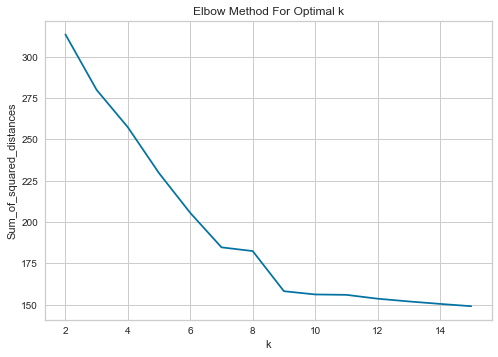

In [32]:
Sum_of_squared_distances = []
K = range(2,16)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [33]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(jobclass_raw,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

wiki_cl.cluster.value_counts()

             title  cluster
323  data engineer        0
260  data engineer        0
449  data engineer        0
442  data engineer        0
274  data engineer        0
..             ...      ...
321  data engineer        8
433  data engineer        8
328  data engineer        8
497  data engineer        8
391  data engineer        8

[539 rows x 2 columns]


2    197
0     49
7     48
6     48
4     48
3     48
1     48
8     33
5     20
Name: cluster, dtype: int64

Cluster: 0
Titles
 machine learning engineer
             data engineer


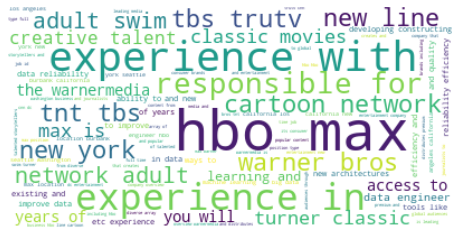

Cluster: 1
Titles
 data engineer


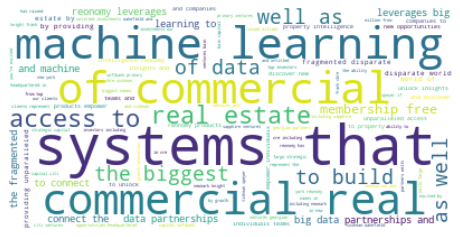

Cluster: 2
Titles
            data scientist
      quantitative analyst
              statistician
              data analyst
        research scientist
 machine learning engineer
             data engineer


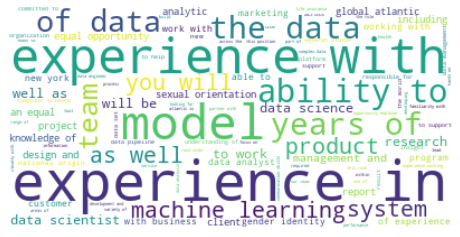

Cluster: 3
Titles
 data engineer


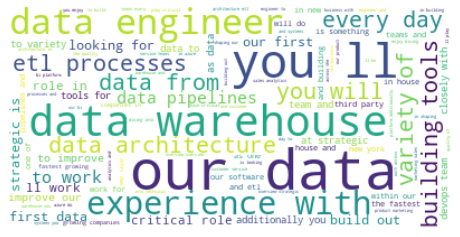

Cluster: 4
Titles
 data engineer


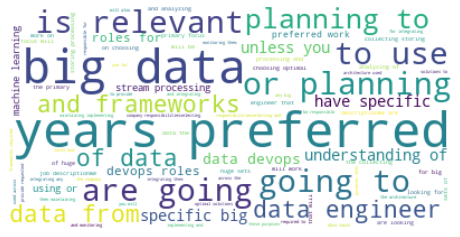

Cluster: 5
Titles
     data scientist
       data analyst
 research scientist


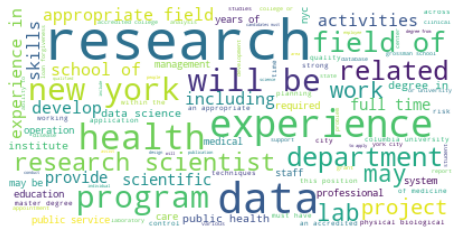

Cluster: 6
Titles
 data engineer


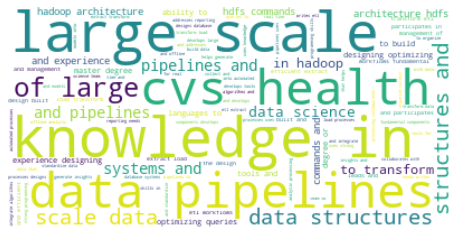

Cluster: 7
Titles
 data engineer


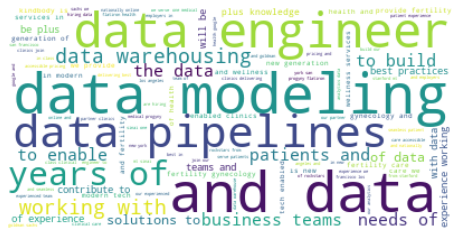

Cluster: 8
Titles
 data engineer


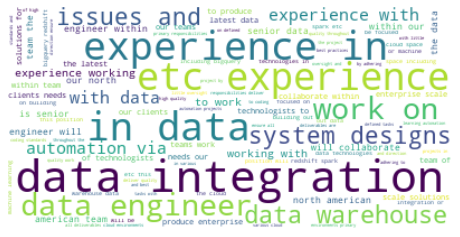

In [34]:
from wordcloud import WordCloud
result={'cluster':labels,'jobdescription':jobdescription_raw}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['jobdescription'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Count: {}'.format())
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    titles=titles.drop_duplicates()
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()